<a href="https://colab.research.google.com/github/garden186/binfo1/blob/master/Binfo1_termprj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 생물정보학 및 실습 1 - Term Project (22.05.27 updated)



## Google Drive 마운트

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 실습용 Bioconda 환경 설치하기


In [ ]:
!git clone https://github.com/hyeshik/colab-biolab.git
!cd colab-biolab && bash tools/setup.sh
exec(open('colab-biolab/tools/activate_conda.py').read())

Cloning into 'colab-biolab'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 69 (delta 22), reused 54 (delta 13), pack-reused 0
Unpacking objects: 100% (69/69), done.
./
./root/
./root/.vimrc
./root/.bashrc.biolab
./root/.bin.priority/
./root/.bin.priority/pip3
./root/.bin.priority/pip
./root/.bin.priority/pip2
./root/.tmux.conf
./root/.condarc
./root/.profile
--2022-05-27 13:56:45--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76607678 (73M) [application/x-sh]
Saving to: ‘miniconda3.sh’

miniconda3.sh       100%[===================>]  73.06M   111MB/s    in 0.7s    

2022-05-27 13:56:46 (111 MB/s) - ‘miniconda3.sh’ save

In [ ]:
!conda install -y bedtools bioawk

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /root/conda/envs/lab

  added / updated specs:
    - bedtools
    - bioawk


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bioawk-1.0                 |       h7132678_7         196 KB  bioconda
    ------------------------------------------------------------
                                           Total:         196 KB

The following NEW packages will be INSTALLED:

  bioawk             bioconda/linux-64::bioawk-1.0-h7132678_7



bioawk-1.0           | 196 KB    | : 100% 1.0/1 [00:00<00:00,  5.99it/s]                
Preparing 

In [ ]:
!conda install -c bioconda fastqc 

## Term Project



## **Crosslinking-induced mutation sites**

---

- dataset : 35L33G, 2J3, and polyclonal Ab of LIN28A CLIP-seq libraries 


#Accession number : GSE37114
1.   A3-1 LIN28A CLIP - 35L33G (mAb)
2.   A3-1 LIN28A CLIP - 2J3 (mAb)
3.   A3-1 LIN28A CLIP - polyclonal

  [NCBI data](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE37114)


# SRA data download

In [ ]:
!wget https://sra-pub-run-odp.s3.amazonaws.com/sra/SRR458758/SRR458758 #35L33G
!wget https://sra-pub-run-odp.s3.amazonaws.com/sra/SRR458759/SRR458759 #2J6
!wget https://sra-pub-run-odp.s3.amazonaws.com/sra/SRR458760/SRR458760 #polyclonal

In [ ]:
!fastq-dump --split-files seqeunces/SRR458758
!fastq-dump --split-files seqeunces/SRR458759
!fastq-dump --split-files seqeunces/SRR458760

In [ ]:
fastqc 35L33G_1.fastqc
fastqc 2J6_1.fastqc
fastqc polyclonal_1.fastqc

#Sequence Analysis
**Sequence Processing and Alignment of CLIP Libraries**

1. FASTX-Toolkit (http://hannonlab.cshl.edu/
fastx_toolkit/).
2. the 3' adaptor sequences were removed from reads by using fastx_clipper.
3. The rest was trimmed from the
30-end so that the remaining reads have Phred quality of 25 or higher.
4. reads of 20 nt or longer were
collapsed to generate a set of unique sequences.
5. The sequences were aligned to abundant contaminant sequences (Illumina
adaptor/primer sequences and mouse ribosomal DNA complete repeating unit, GenBank accession BK000964.1) with GSNAP
version 2012-01-11 (Wu and Nacu, 2010) with 10% mismatch rate.
6. Filtered reads that do not match to any contaminant and have
sufficient sequence complexity (Shannon’s entropy, at least 0.7 for mononucleotide, 1.5 for dinucleotide) were aligned to UCSC
(the University of California, Santa Cruz) mm9 genome assembly with GSNAP version 2012-01-11 with options of 10% mismatch
rate, no terminal clipping, and splice site annotations from RefSeq (downloaded from UCSC Genome Browser on Aug 19, 2011).

#Sequence pre-processing

1. FASTX-Toolkit install

2. fastx_clipper : 3'adaptor sequences removed 
[fastx_clipper](https://hannonlab.cshl.edu/fastx_toolkit/commandline.html#fastx_clipper_usage)

3. trimming 30-end

4. 20 nt or longer reads collapsed

In [ ]:
!conda install fastqc fastx_toolkit
!conda install fastqc

In [ ]:
fastq_to_fasta -v -n -i 35L33G_1.fastq -o 35L33G_1.fa
fastq_to_fasta -v -n -i 2J6_1.fastq -o 2J6_1.fa
fastq_to_fasta -v -n -i polyclonal_1.fastq -o polyclonal_1.fa

In [ ]:
fastx_clipper -v -n -i 35L33G_1.fa -o 35L33G.clipped.fa
fastx_clipper -v -n -i 2J6_1.fa -o 2J6.clipped.fa
fastx_clipper -v -n -i polyclonal_1.fa -o polyclonal.clipped.fa

In [ ]:
fastx_trimmer -v -f 1 -l 27 -i 35L33G.clipped.fa -o 35L33G.trimmed.fa
fastx_trimmer -v -f 1 -l 27 -i 2J6.clipped.fa -o 2J6.trimmed.fa
fastx_trimmer -v -f 1 -l 27 -i polyclonal.clipped.fa -o polyclonal.trimmed.fa

In [ ]:
fastx_collapser -v -i 35L33G.trimmed.fa -o 35L33G.collapsed.fa
fastx_collapser -v -i 2J6.trimmed.fa -o 2J6.collapsed.fa
fastx_collapser -v -i polyclonal.trimmed.fa -o polyclonal.collapsed.fa

In [ ]:
!ls -al /content/drive/MyDrive/binfo1/termprj/

total 8389928
-rw------- 1 root root     663425 May 27 14:12 2J6_1_fastqc.html
-rw------- 1 root root 2919296781 May 27 13:37 2J6.clipped.fa
-rw------- 1 root root  141456898 May 27 13:37 2J6.collapsed.fa
-rw------- 1 root root 2541505275 May 27 13:38 2J6.trimmed.fa
-rw------- 1 root root     663422 May 27 14:12 35L33G_1_fastqc.html
-rw------- 1 root root  167860294 May 27 13:53 35L33G.collapsed.fa
-rw------- 1 root root 2819837636 May 27 13:54 35L33G.trimmed.fa


#Alignment


**Sequence reads were mapped to a mouse genome assembly (mm9) using GSNAP with maximum 10% mismatches (for CLIP and untreated PolyA RNA-seq)** or 5% mismatches (for RPF or the rest of PolyA RNA-seq). The best hits with maximum two mismatches that aligns to single position of genome were counted for RNA-seq transcript level expression. For RPF and CLIP lanes, the reads were aligned again to non redundant subset of RefSeq transcripts with fixed of single nucleotide polymorphisms detected in RNA-seq. 5'-most 26nt of tag reads were used for alignment of RPF and siRNA-treated RNA-seq reads. Transcript-level tag count were calculated using intersectBed with modified annotations of RefSeq, miRBase, RepeatMasker, rfam and tRNAdb. The detailed description of the analysis pipeline is available on supplementary methods section of the paper.

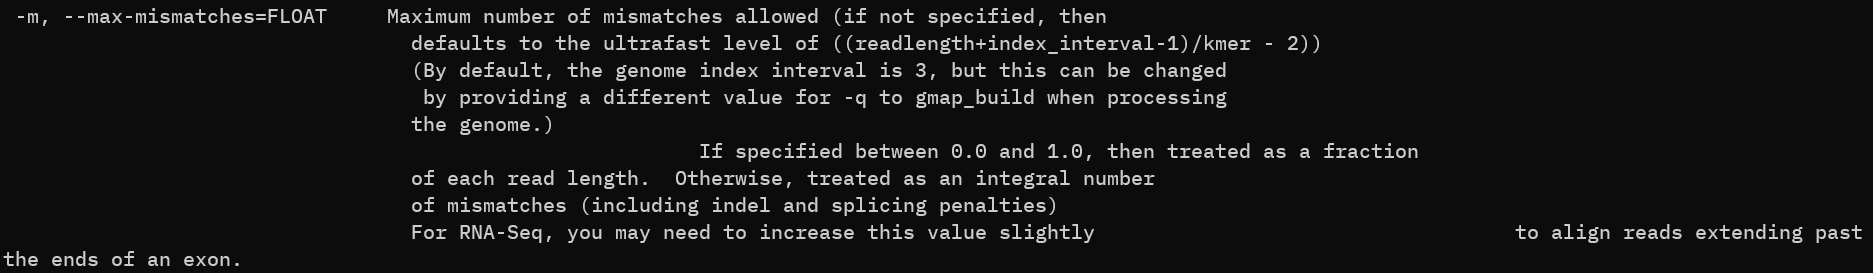

# Tools for Alignment & Mapping
>>GSNAP(Genomic Short-read Nucleotide Alignment Program)은 Illumina/Solexa 또는 ABI/SOLiD와 플렛폼에서 얻은 짧은 single-, paired-end reads를 모두 읽어 alignment 하기 위한 알고리즘이다. [GMAP/GSNAP](https://github.com/juliangehring/GMAP-GSNAP/blob/master/README)
---

1. GMAP_build

2. GSNAP


In [ ]:
# 처음에 무슨 말인 줄 몰라서 엄..청..나게 애를 먹었다... 그런데 아직도 잘 모르겠는..

gmap_build -D . -d mm9
gsnap -d mm9 -m 0.1 --force-single-end 35L33G.trimmed.fa
gsnap -d mm9 -m 0.1 --force-single-end 2J6.trimmed.fa
gsnap -d mm9 -m 0.1 --force-single-end polyclonal.trimmed.fa

# 뭔가 잘못 align을 한 것 같아서 수정 중에 있습니다..

In [ ]:
%cd /content/drive/MyDrive/binfo1/termprj/

/content/drive/MyDrive/binfo1/termprj


##여기서부터는 Mission3 를 보완해서 데이터 분석 진행할 예정입니다.

Genome 전체로 계산하는 방법은 자원도 꽤 쓰고 시간이 걸리기 때문에 여기서는 유전자 단위로 간략하게 하도록 합시다. 예시로 Mirlet7g를 해 보고, 추가로 Mirlet7f-1과 Mirlet7d도 봐서 비교해 봅시다.

논문은 예전 레퍼런스 유전체인 mm9을 쓰고 있기 때문에, 현재 사용되는 레퍼런스 mm39와는 좌표계에 차이가 있습니다. 새로 annotation에서 위치를 찾습니다.

In [ ]:
!grep -i mirlet7g gencode.gtf

Splicing 되지 않는 transcript이기 때문에 결과가 단조롭습니다. 해당 좌표 범위로 bam을 솎아냅니다.

In [ ]:
!samtools view -b -o CLIP-let7g.bam CLIP-35L33G.bam chr9:106056039-106056126
!samtools view CLIP-let7g.bam | wc -l

각 자리에 mapping된 read들의 분포를 요약하기 위해 samtools mpileup을 이용합니다. Shannon entropy를 구할 때는 reference를 따로 줄 필요는 없습니다. samtools를 쓰지 않고 직접 read를 분석하면 더욱 더 재미있습니다.

In [ ]:
!samtools mpileup CLIP-let7g.bam > CLIP-let7g.pileup
!wc -l CLIP-let7g.pileup

Mirlet7g는 100bp도 안 되는 짧은 gene인데 `mpileup` 결과는 엄청 길게 나옵니다. 왜 그럴까요? (잘 한 번 생각해 봅시다)

이제 Mirlet7g의 핵심부분을 살펴봐서 어떻게 하면 좋을지 견적을 내 봅니다.

In [ ]:
!head CLIP-let7g.pileup

In [ ]:
!awk '$2 >= 106056039 && $2 <= 106056126 { print $0; }' CLIP-let7g.pileup > CLIP-let7g-gene.pileup
!tail CLIP-let7g-gene.pileup

이제 pandas에 불러와서 분석해 봅니다. R을 쓰시는 분들은 R로 보내서 작업하셔도 됩니다.

In [ ]:
import pandas as pd

pileup = pd.read_csv('CLIP-let7g-gene.pileup', sep='\t', names=['chrom', 'pos', '_ref', 'count', 'basereads', 'quals'])
pileup.tail()

여기서 pileup에서 계산에 사용할 것은 match와 substitution만입니다. 나머지에 해당하는 tag들은 제거합니다.

R을 쓰시는 분들은 R로 보내서 작업하셔도 됩니다.

In [ ]:
import re
toremove = re.compile('[<>$*#^]')
pileup['matches'] = pileup['basereads'].apply(lambda x: toremove.sub('', x))

In [ ]:
pileup[['chrom', 'pos', 'matches']]

In [ ]:
pileup[pileup['pos'] == 106056094].iloc[0]['matches']

자 이제 데이터 준비가 대충 끝났습니다. 다음 순서로 진행해 보세요. (1-4번 단계는 R을 쓰시는 분들은 R로 보내서 작업하셔도 됩니다.)

1. 각 position별로 base수를 셉니다.
1. 각 position별로 Shannon entropy를 계산합니다.
1. 계산한 Shannon entropy를 [bedgraph format](https://genome.ucsc.edu/goldenPath/help/bedgraph.html)으로 출력합니다. 말은 복잡해도 실제로는 간단합니다. 4칸짜리를 만드시면 됩니다.
1. 결과 파일을 본인의 Google Drive에서 가져옵니다.
1. [UCSC Genome Browser](http://genome.ucsc.edu/cgi-bin/hgTracks?db=mm39&lastVirtModeType=default&lastVirtModeExtraState=&virtModeType=default&virtMode=0&nonVirtPosition=&position=chr9%3A106056039-106056126)에 접속해서 Genome은 mm39로 선택합니다.
1. 그래프 아랫쪽의 add custom tracks 버튼을 누릅니다.
1. Paste URLs or data 옆의 Choose File 버튼을 누르고 우리가 만든 bedgraph 파일을 업로드 합니다.
1. 그리고 이리 저리 감상해 보다가 View 메뉴의 PDF/PS 를 눌러서 인증샷을 한 번 찍습니다.
1. Mirlet7d와 Mirlet7f-1도 한 번 해 봅니다.